In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("training_mush.csv")

In [4]:
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
np.random.seed(0)

In [19]:
X = df.drop(columns = "class").to_numpy()
y = df["class"].to_numpy()

In [21]:
params = {"n_estimators":range(10, 60, 10), "max_depth":range(1,14, 2), "min_samples_leaf":range(1,8), "min_samples_split":range(2,11,2)}
clf = RandomForestClassifier(random_state=0)
search = GridSearchCV(clf, params, cv=3, n_jobs = -1)
search.fit(X, y)


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [22]:
search.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [23]:
rf = search.best_estimator_

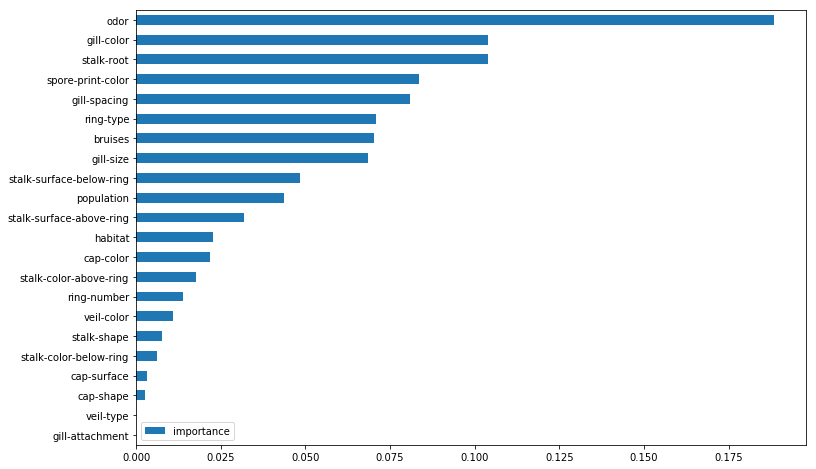

In [24]:
imp = pd.DataFrame(rf.feature_importances_, index=df.columns[:-1], columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [25]:
df_test = pd.read_csv("testing_mush.csv")

In [27]:
sum(rf.predict(df_test))

976

In [28]:
y_true = pd.read_csv("testing_y_mush.csv")

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
confusion_matrix(y_true, rf.predict(df_test))

array([[1055,    0],
       [   0,  976]])

In [32]:
df = pd.read_csv("invasion.csv")

In [35]:
X_train= df[df.columns[1:]].to_numpy()

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = df[df.columns[0]]
y_train = le.fit_transform(y_train)

In [38]:
params = {"n_estimators":range(10, 60, 10), "max_depth":range(1,14, 2), "min_samples_leaf":range(1,8), "min_samples_split":range(2,11,2)}
clf = RandomForestClassifier(random_state=0)
search = GridSearchCV(clf, params, cv=3, n_jobs = -1)
search.fit(X_train, y_train)


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [39]:
re = search.best_estimator_

In [40]:
df_test = pd.read_csv("operative_information.csv")

In [42]:
X_test = df_test.to_numpy()

In [44]:
predictio = le.inverse_transform(re.predict(X_test))

In [46]:
from collections import Counter

In [54]:
cnt = Counter(predictio)

In [55]:
cnt

Counter({'fighter': 675, 'transport': 595, 'cruiser': 230})

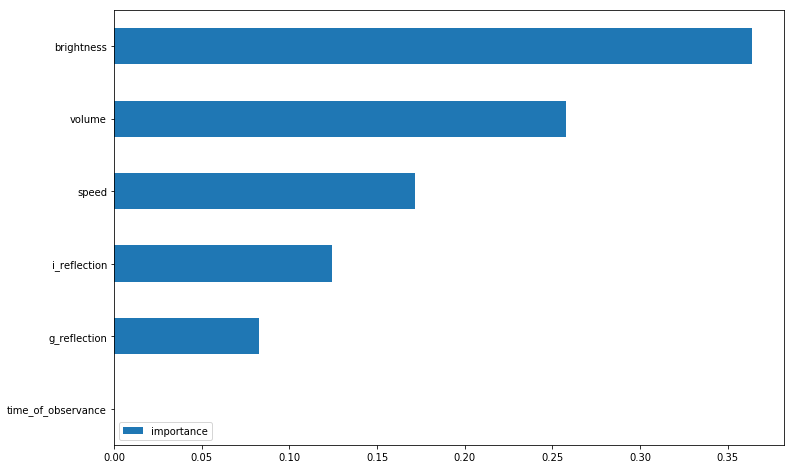

In [49]:
imp = pd.DataFrame(re.feature_importances_, index=df_test.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [50]:
df = pd.read_csv("space_can_be_a_dangerous_place.csv")

In [52]:
df.columns

Index(['r', 'phi', 'peradventure_index', 'dustiness', 'black_hole_is_near',
       'buggers_were_noticed', 'nearby_system_has_planemo', 'dangerous'],
      dtype='object')

In [53]:
df.head()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1


In [58]:
X = df[df.columns[:-1]].to_numpy()
y = df[df.columns[-1]].to_numpy()

In [59]:
#params = {"n_estimators":range(10, 60, 10), "max_depth":range(1,14, 2), "min_samples_leaf":range(1,8), "min_samples_split":range(2,11,2)}
clf = RandomForestClassifier(random_state=0)
search = GridSearchCV(clf, params, cv=3, n_jobs = -1)
search.fit(X, y)


KeyboardInterrupt: 

In [60]:
clf = RandomForestClassifier(random_state=0, n_estimators=20, max_depth=6, min_samples_split=3, min_samples_leaf=5)

In [61]:
clf.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

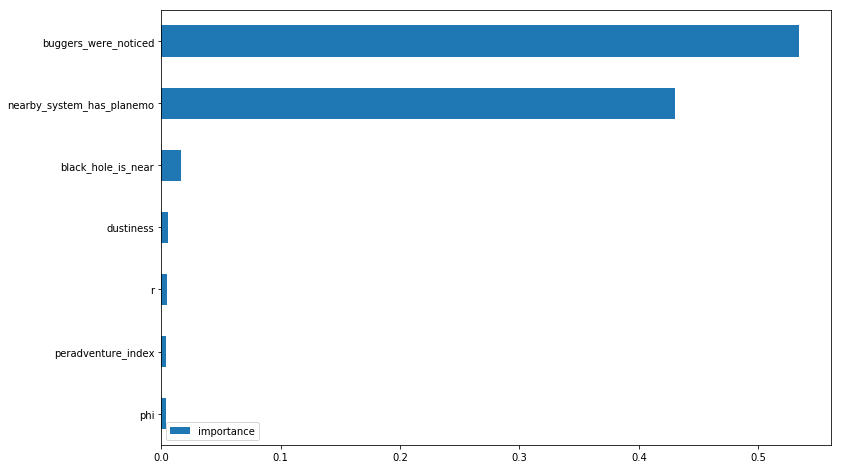

In [62]:
imp = pd.DataFrame(clf.feature_importances_, index=df.columns[:-1], columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [64]:
%%timeit
df.mean(axis = 0)

2.71 ms ± 124 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [65]:
%%timeit
df.apply('mean')

3.86 ms ± 146 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [66]:
%%timeit
df.describe().loc['mean']

48.3 ms ± 5.43 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [67]:
%%timeit
df.apply(np.mean)

4.04 ms ± 270 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [57]:
X

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo
0,169.1,138.0,22.3212,0.706285,0,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1
5,206.6,13.0,27.2712,-0.233592,0,1,1
6,293.0,263.0,38.6760,-0.870781,0,1,1
7,83.1,205.0,10.9692,0.925809,0,1,1
8,53.0,305.0,6.9960,0.327122,0,1,1
9,35.1,189.0,4.6332,-0.726962,0,1,1
